# Project Title

Customer Behavior Analysis and Predictive Modeling for Online Shopping

# Project Overview

The goal of this project is to analyse customer purchasing behavior in an online retail environment and extract actionable insights that support marketing, personalization, and revenue-driven business decisions. Building on extensive data cleaning, data visualisation, and predictive modeling, will explore how user characteristics, session activity, and product interactions relate to purchase probability and spending outcomes.

The project results include:

- A fully cleaned and structured dataset suitable for modeling.
- Visual insights into customer behavior, value segments, and purchase drivers.
- Predictive models capable of estimating purchase probability and spending levels.
- Actionable patterns for marketing, such as product bundles, segment-specific strategies, and personalized targeting.

# Dataset Description

Source: Online Shopping Dataset – Kaggle

https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset/code


This dataset contains customer attributes and shopping behaviors such as:

- Demographics (gender, age, location)
- Product categories viewed
- Session duration and number of items viewed
- Purchase decisions (whether a purchase was made)
- Spending amount and payment method
- Ratings and satisfaction

# Project Goals

1. Data Cleaning
   - 1.1. Initial inspection
   - 1.2. Drop rows missing critical identifiers

2. Data Visulaisation
   - 2.1. TOP 30 Popular Customer ID With Purchase Count
   - 2.2. TOP 20 Costliest Purchase IDs
   - 2.3. Male-Female Comparison
   - 2.4. Time Series Analysis

3. Analysis of purchasing behavior patterns in different customer segments.
    - 3.1. The Algorithm: RFM Analysis
    - 3.2. Predicting Your Most Valuable Customers
    - 3.3. Model Interpretation

In [1]:
# load packages

import pandas as pd
import numpy as np

In [2]:
# data loading
path = 'archive/file.csv'
df = pd.read_csv(path)


In [3]:
# quick audit

print('Shape (rows, cols) = ', df.shape)

print('First 5 rows:')
display(df.head(n=5))

print('\nSchema / dtypes:')
display(df.dtypes)

print('Info()')
display(df.info())

Shape (rows, cols) =  (52955, 21)
First 5 rows:


,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0



Schema / dtypes:


Unnamed: 0               int64
CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
dtype: object

Info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 no

None

In [4]:
from summarytools import dfSummary
display(dfSummary(df))

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 26477.0 (15286.9)min < med < max:0.0 < 26477.0 < 52954.0IQR (CV) : 26477.0 (1.7),"52,955 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAcZJREFUeJzt10FOwmAQQOH5GyUgpA0hwgG8AUsO4WE9BCdg4cYVOxLSlFAxGqwnACk16kvet22nM4sXElLTNCH9d9lfHyBd4ua7F1JKg4joXfn9LCI+r5ztOk/dTb276/x70zSHUw/PhppSGkwmk8c8z8dttx6Px9u6rh9Go9FLlmUfvzlP3U29+yfmd7tdmVJ6OhXrd7+ovTzPx4vF4lAUxVubxev1erxare7n8/nzbDYr28x2nafupt7ddb6qqv5yuRxvt9teRFwVakREFEXxNp1OX9ssL8tyEBExHA5bz3adp+6m3v0T8xExOPfQP1NCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCuHmkpeqquq3/fB+v+9HRNR13d9sNne/OU/dTb276/wlfX0BkpY55nO5980AAAAASUVORK5CYII="">",0(0.0%)
2,CustomerID[float64],Mean (sd) : 15346.7 (1766.6)min < med < max:12346.0 < 15311.0 < 18283.0IQR (CV) : 3127.2 (8.7),"1,468 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAArVJREFUeJzt3E1u4jAYgOHPQynhR0EICXZcYKRZsMwh5rBzhC44ATdgh4QQiLQRIWRWXYxUGGLHjb/wPtsqxKre1DG2asqyFCB0P5oeAPCIl6YHgPYwxvRF5NXy8nNZlh+3fvjfUH3e3CfHcYs0OHaNjDH96XT6O47jic31x+Nxb4z5c+t3fjdU3zf3xXXcIs2NvUmOD3c8Go1mSZIcx+NxVuXCw+EQrVaryW63exWR6qGKyGscx5MkST583Nwj63GLND72Rrg+3HmeR0VR/Oz1em+z2ezd4iP693740DvqeDzOfNzcN4dxizQ89gY4PdybzWayXq8Hl8ul42NwLKbwD9uHe7/fe32wCfWGoii6IhIbY2wuZyFWM0L9Qpqm3TzPfy0Wi06n06k8DT7jQsw3Qv3C+Xx+iaJosFwus/l8vq9y7TMuxL4Dod4xHA5VLiLbiC1UqMBfVA9YiNWPUGvGQswPQq0ZCzE/vIbqOAWKKJ4GWYjVy1uorlOgCNOgDYeDJfH1eu3WPZ66eAvVZQoUYRq04XKw5PNQSZZlbyJiez7CG+/vqA5ToAjTYFXWB0t8HypxxWKqhWwOlvg+VOKKL/yhAqFCBUKFCoQKFQgVKhAqVAj66ymHLdigd1lQXbChumzBhr7LguqCDdVlCzb0XRZUF2yon2y2YEPfZUF1wYf6bByPRrb23ZxQA+J6NLLN7+aEGhDXo5Ftfjcn1ADZHo1s87s5X/hDBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQoP/Wv0w+EQVf3g0+kUiYikaRptt9vBd16v9d5ax+16/SN9/QXLrrTFwcAMlQAAAABJRU5ErkJggg=="">",31(0.1%)
3,Gender[object],1. F2. M3. nan,"33,007 (62.3%)19,917 (37.6%)31 (0.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZZJREFUeJzt28Ftg0AURdE3CDnxBoSQXELSA0Wk2BRBEekBIWYRO95MFqmBN4R/TwXf1pUtLL9UShHg0NQ+AHEkSVdJl9qHBPcspdxrH7G3dhzHj67rhtqHRJZzXlNKn2cPru26bpim6d73/aP2MRFt2/Y6z/OwLMtF0rljk6S+7x+32+279jGBXWsf4MADAmyIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthg00p//6mqfUhUkd77Nue8zvM8KMh/qo4o57xKeta+Y29sEI4hxAYhMeWDS6RPthCfHkcWZl0VZcF0ZCHWVZEWTEcWaV3F03Zl/KgLG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtiEWFed/fX9F2HWVVEWTEfGBgE2rKtgwwMCbIgNNk1K6T2lxNMadtdIepP0UvsQnB9fo7AhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthg00j6kvRT+xCcH+sq2PA1Cptf50VzOuduQZ4AAAAASUVORK5CYII="">",31(0.1%)
4,Location[object],1. Chicago2. California3. New York4. New Jersey5. Washington DC6. nan,"18,380 (34.7%)16,136 (30.5%)11,173 (21.1%)4,503 (8.5%)2,732 (5.2%)31 (0.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjcsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvTLEjVAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqZJREFUeJzt281pG1EYheFvhHDijYQwuISkBxWRYlOEikgPwngWseONssjCZGNbw/jc+XmeCq7gZYYr5nSXy6UgYdP6AKyH2IgRGzFiI6arqtuquml9kE/wcrlcnlofglfbu7u7H7vd7tD6IGPr+/6h67qfgpuO7W63OxyPx6f9fv/c+jBjeXx8/Ho6nQ7n8/mmqsQ2Eduqqv1+/3x/f/+79WFGdtv6APzPBYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiNlW/fskp/VBxrS037MU277vH06n06EW9klO3/cPVfXS+hy88lk4MZ2RMilzf7J5es3IrAcvRi3zMtvBi1HL/Mx98LKoG/TS+VOXGLERIzZixEaM2IgRGzFiI0Z

## 1. Data Cleaning Workflow
## 1.1 Initial inspection
- missing value counts per column

In [5]:
# data cleaning 

# check missing data 
missing_count = df.isna().sum().sort_values(ascending=False) # value is missing (NaN)
print('\nMissing Values')
display(missing_count)


Missing Values


Discount_pct           400
Coupon_Code            400
Gender                  31
Location                31
CustomerID              31
Offline_Spend           31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Quantity                31
Avg_Price               31
Product_SKU             31
Product_Description     31
Online_Spend            31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Unnamed: 0               0
Product_Category         0
Month                    0
dtype: int64

- Check for duplicates

In [6]:
# check duplicants
dup_count = df.duplicated().sum()
print(f"\nDuplicated rows:{dup_count}")


Duplicated rows:0


- Inspect sample unique values for categorical columns:

In [7]:
#for col in df.select_dtypes(include=['object']).columns:
#    print(col, df[col].nunique(), df[col].unique()[:10])

cat_cols = df.select_dtypes(include=['object']).columns
summary = pd.DataFrame({
    'Unique Count': [df[c].nunique() for c in cat_cols],
    'Sample Unique Values': [df[c].unique()[:10] for c in cat_cols]
}, index=cat_cols)

display(summary)

,Unique Count,Sample Unique Values
Gender,2,"[M, F, nan]"
Location,5,"[Chicago, California, New York, New Jersey, Wa..."
Transaction_Date,365,"[2019-01-01, 2019-01-03, 2019-01-04, 2019-01-1..."
Product_SKU,1145,"[GGOENEBJ079499, GGOENEBQ078999, GGOENEBQ07909..."
Product_Description,404,[Nest Learning Thermostat 3rd Gen-USA - Stainl...
Product_Category,21,"[Nest-USA, Office, Apparel, Bags, Drinkware, L..."
Coupon_Status,3,"[Used, Not Used, Clicked, nan]"
Date,365,"[1/1/2019, 1/3/2019, 1/4/2019, 1/16/2019, 1/17..."
Coupon_Code,48,"[ELEC10, OFF10, SALE10, AIO10, EXTRA10, WEMP10..."


### 1.2. Drop rows missing critical identifiers

- Select these three ('CustomerID', 'Transaction_ID', 'Transaction_Date') as key identifiers that define the existence and traceability of a record.

In [8]:
df = df.dropna(subset=['CustomerID', 'Transaction_ID', 'Transaction_Date'])

df.isna().sum().sort_values(ascending=False)

Discount_pct           400
Coupon_Code            400
Gender                   0
CustomerID               0
Unnamed: 0               0
Tenure_Months            0
Location                 0
Transaction_ID           0
Transaction_Date         0
Product_Category         0
Quantity                 0
Product_SKU              0
Product_Description      0
Delivery_Charges         0
Avg_Price                0
Coupon_Status            0
GST                      0
Offline_Spend            0
Date                     0
Month                    0
Online_Spend             0
dtype: int64

In [9]:
df.loc[:, 'Discount_pct'] = df['Discount_pct'].fillna(0)
df.loc[:, 'Coupon_Code'] = df['Coupon_Code'].fillna('None')


df.isna().sum().sort_values(ascending=False)

Unnamed: 0             0
CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [10]:
# --- sanity check columns ---
df.columns.tolist(), df.dtypes

(['Unnamed: 0',
  'CustomerID',
  'Gender',
  'Location',
  'Tenure_Months',
  'Transaction_ID',
  'Transaction_Date',
  'Product_SKU',
  'Product_Description',
  'Product_Category',
  'Quantity',
  'Avg_Price',
  'Delivery_Charges',
  'Coupon_Status',
  'GST',
  'Date',
  'Offline_Spend',
  'Online_Spend',
  'Month',
  'Coupon_Code',
  'Discount_pct'],
 Unnamed: 0               int64
 CustomerID             float64
 Gender                  object
 Location                object
 Tenure_Months          float64
 Transaction_ID         float64
 Transaction_Date        object
 Product_SKU             object
 Product_Description     object
 Product_Category        object
 Quantity               float64
 Avg_Price              float64
 Delivery_Charges       float64
 Coupon_Status           object
 GST                    float64
 Date                    object
 Offline_Spend          float64
 Online_Spend           float64
 Month                    int64
 Coupon_Code             object
 Dis

### Adding Information To Dataset

- Total Prices is calculated from average price, quantity, and delivery charges.
- Total_Spend combines offline and online spending.

In [11]:
import calendar


df['Total Prices']=df['Avg_Price']*df['Quantity']+df.Delivery_Charges
df['Total_Spend']=df['Offline_Spend']+df['Online_Spend']
new=df[['Offline_Spend','Online_Spend','Month','Total_Spend']].groupby('Month').sum()

mon=list(calendar.month_name)[1:]

## 2. Data Visulaisation 

### 2.1 TOP 30 Popular Customer IDs With Purchase Count

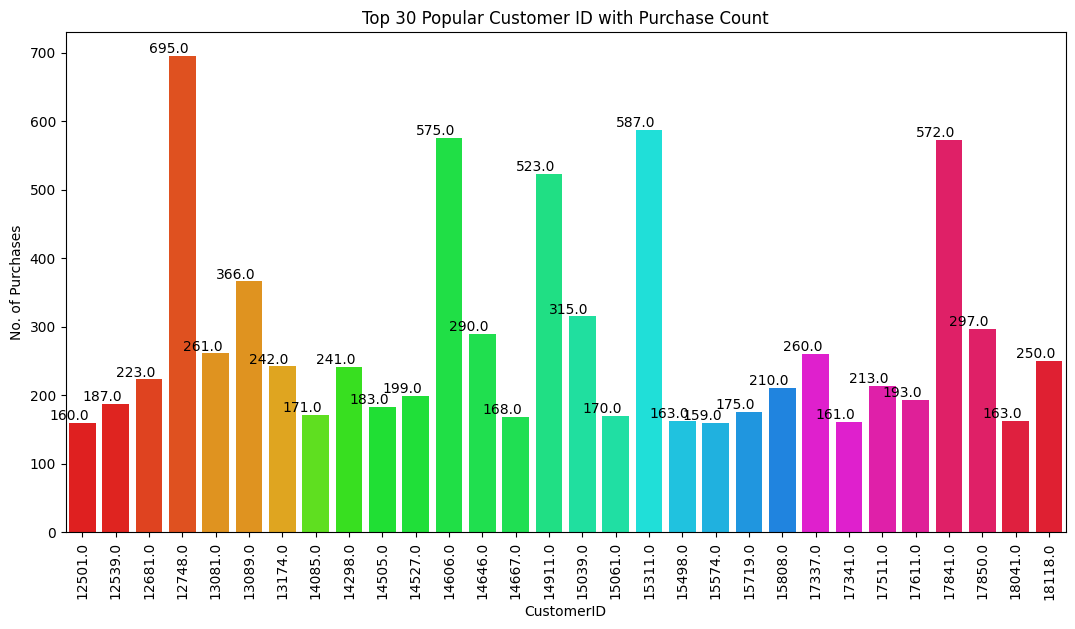

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

fig=plt.figure(figsize=(10,5))
axis=fig.add_axes([1,1,1,1])
val1=df.CustomerID.value_counts().sort_values(ascending=False).head(30)
sb.barplot(
    x=val1.index,
    y=val1,
    hue=val1.index,        
    palette='hsv',
    legend=False,         
    ax=axis
)
plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.title('Top 30 Popular Customer ID with Purchase Count')
for i in axis.patches:
    axis.annotate(i.get_height(),(i.get_x(),i.get_height()),va='bottom',ha='center')

#### Graph interpretation:

##### 1. Heavy-tailed purchase distribution (Outliers)

- A small group of customers accounts for a disproportionately large number of purchases.

- The top customer buys 3–4× more than most others, showing strong concentration.

- This pattern suggests B2B or bulk-order behavior from a minority of highly active clients.

- Customer 12748 stands out as an outlier with exceptionally high activity.

##### 2. Mid-tier repeat customers

- Beyond the top outliers, there is a stable cluster of customers with consistent medium-level activity (150–300 purchases).

- These buyers likely represent regular but not bulk customers.

- They contribute to steady revenue and form the backbone of the customer base.

##### 3. Long tail of low-activity customers

- Most customers outside the top 30 have relatively few purchases.

- This is typical in retail datasets where many buyers make occasional or one-time purchases.

- This indicates potential for retargeting, reactivation campaigns, or loyalty programs.

### 2.2. TOP 20 Costliest Purchase ID's


Text(0.5, 0, 'Customer ID')

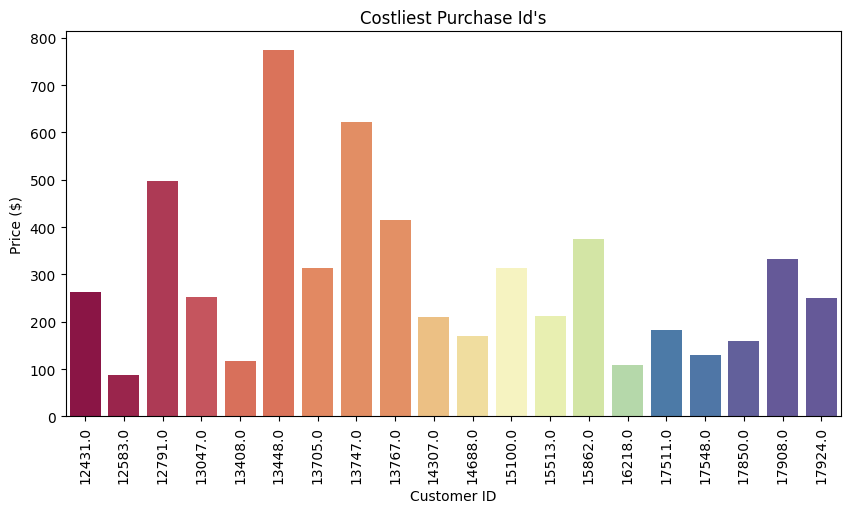

In [13]:
val2=df[['CustomerID','Total Prices']]
x=val2.CustomerID.unique()[:20]
y=val2['Total Prices'].unique()[:20]
fig,axis=plt.subplots(figsize=(10,5))

val2=val2.sort_values(by='Total Prices',ascending=False)
sb.barplot(x=x,y=y,hue=x, palette='Spectral',ax=axis, legend=False)
plt.xticks(rotation=90)
plt.title("Costliest Purchase Id's")
plt.ylabel('Price ($)')
plt.xlabel('Customer ID')

Graph interpretation:

- Customer 13448 made the single highest-cost purchase (≈ $780).

- A few customers (13705, 13767, 13047) also show very high individual purchases ($400 – 600 range).

- Most of the remaining customers have moderate purchase values (~$150–$350).

- A smaller group shows lower-cost purchases (< $150).

The pattern suggests large variability in individual transaction amounts, likely driven by product type or order size.

### 2.3. Male-Female Comparison

#### - Total Purchase Comparison


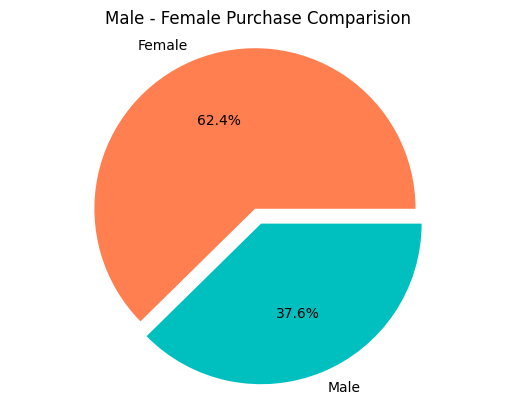

In [14]:
val3=df.Gender.value_counts()
colors = ['coral', 'c'] 
plt.pie(val3,labels=['Female','Male'],autopct="%1.1f%%",explode=(0.1,0), colors = colors)
plt.axis('equal')
plt.title('Male - Female Purchase Comparision')
sb.set(style='white')

#### - Price Spent Comparison


Text(0.5, 1.0, 'Price Spend')

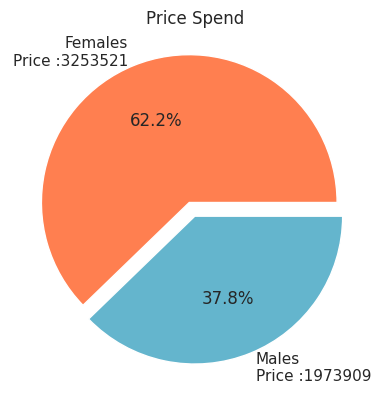

In [15]:
male=df[['Total Prices','Gender']].groupby('Gender').get_group('M')['Total Prices'].sum()
female=df[['Total Prices','Gender']].groupby('Gender').get_group('F')['Total Prices'].sum()
sizes=[round(female), round(male)]
labels=['Females', 'Males']
colors = ['coral', 'c'] 
plt.pie(sizes,autopct='%1.1f%%',labels=[f'{label}\nPrice :{size}' for label, size in zip(labels, sizes)],explode=(0.1,0), colors= colors)
plt.title('Price Spend')


- Females dominate overall customer activity, making up about 62% of both purchase counts and total spending.

- Males contribute around 38%, showing a consistently lower share in both the number of purchases and the total money spent.

The alignment between purchase count and spending share indicates that female customers not only buy more often but also spend more overall.

### 2.4. Time Series Analysis

#### - Online Spend
#### - Offline Spend
#### - Total Spend


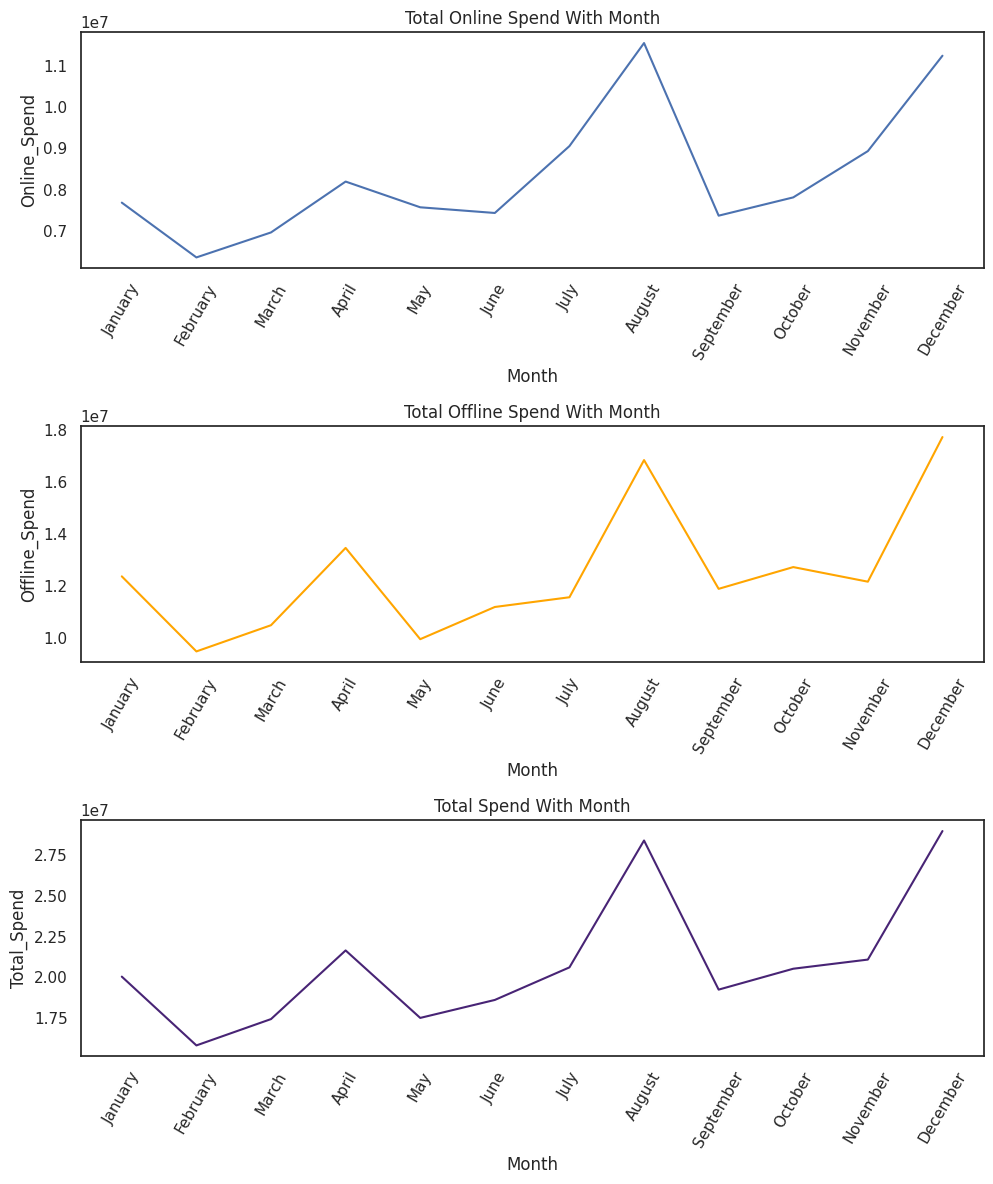

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# --- Plot 1: Online Spend ---
sb.lineplot(ax=axes[0], x=new.index, y=new.Online_Spend)
axes[0].set_xticks(new.index)
axes[0].set_xticklabels(mon, rotation=60)
axes[0].set_title("Total Online Spend With Month")

# --- Plot 2: Offline Spend ---
sb.lineplot(ax=axes[1], x=new.index, y=new.Offline_Spend, color='orange')
axes[1].set_xticks(new.index)
axes[1].set_xticklabels(mon, rotation=60)
axes[1].set_title("Total Offline Spend With Month")

# --- Plot 3: Total Spend ---
c1 = plt.cm.viridis      # example colormap
sb.lineplot(ax=axes[2], x=new.index, y=new.Total_Spend, color=c1(0.1))
axes[2].set_xticks(new.index)
axes[2].set_xticklabels(mon, rotation=60)
axes[2].set_title("Total Spend With Month")

plt.tight_layout()
plt.show()


### Interpretation and Comparison

#### 1. Online Spend Trend

- Starts moderate in January.
- Drops in February–March.
- Peaks strongly in August, then rises again toward December.

Shows a seasonal pattern with two major surges (August & December).

#### 2. Offline Spend Trend

- Higher baseline than online spend.
- similar monthly pattern to online spend 

Offline spending remains consistently larger than online throughout the year.

#### 3. Total Spend Trend

- Shows a combination of both patterns.
- Clear the highest peak in August, driven by both online and offline spikes.
- Second peak in December, likely due to year-end shopping behavior.
- Lowest values occur in February–March.

#### Overall Comparison

- August is the strongest spending month for online, offline, and total purchases.
- December is the second-highest, supporting typical holiday or year-end demand.
- Offline spending dominates online spending across all months.
- Both channels follow similar seasonality, but offline spending shows more variability.

# 3. Analysis of purchasing behavior patterns in different customer segments.

- How can we group our customers into distinct segments based on their most recent activity, how often they shop, and the total amount of money they spend?

The best way to quantify purchasing behavior is by using RFM (Recency, Frequency, Monetary Value) analysis. This is a simple yet powerful method to segment customers based on their transactional history.

## 3.1. The Algorithm: RFM Analysis

1. Recency (R): How long ago a customer made their last purchase. Customers who bought recently are more likely to respond to promotions.

    - Calculation: Last transaction date minus a chosen "snapshot" date. Lower Recency is better.

2. Frequency (F): How often a customer has made a purchase. Customers who buy often are more engaged.

    - Calculation: Total number of transactions. Higher Frequency is better.

3. Monetary Value (M): The total amount of money a customer has spent. High-spending customers are your most valuable.

    - Calculation: Sum of all revenue generated by the customer. Higher Monetary Value is better.

#### The process involves:

1. Data Preparation: Calculating a Revenue column and converting the Transaction Date to a datetime object.

2. RFM Calculation: Grouping the data by Customer_ID to calculate R, F, and M.

3. Scoring: Assigning scores (e.g., 1 to 5, where 5 is the best) to each RFM metric using quantiles.

4. Segmentation: Combining the scores to create customer segments (e.g., Champions for high R, F, M).


In [17]:
import datetime as dt

#------- Step 1: Data Preparation ------- #

# convert the Transaction_Date to datetime objects
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

#Create a 'Revenue' Column based on available columns: Quantity and Avg_Price
df['Revenue'] = df['Quantity'] * df['Avg_Price']

#------- Step 2: Calculate RFM metrics -------#


#define Snapshot date (one day after the last transaction)
snapshot_date = df['Transaction_Date'].max() + dt.timedelta(days=1)

# Calculate RFM per Customer 
rfm_df = df.groupby('CustomerID').agg(
    Recency=('Transaction_Date', lambda x: (snapshot_date - x.max()).days),
    Frequency=('CustomerID', 'count'),
    Monetary=('Revenue', 'sum')
).reset_index()

#------- Step 3: Assign RFM Score ------Time Series Analaysis-#

#R_score (5 is best for a customer who made a purchase more recently)
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

# F_Score (5 is best for most frequent buyers)
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# M_Score (5 is best for the max money a customer has spent.)
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Total RFM Score
rfm_df['Total_RFM_score'] = rfm_df['R_score'] + rfm_df['F_score'] + rfm_df['M_score']

#------- Step 4: Define segments based on total score -------#

def rfm_segment(score):
    if score >= 13:
        return '1_Champions'
    if score >=10:
        return '2_Promising Customers'
    if score >= 7:
        return '3_Need Attension'
    else:
        return '4_At Risk of Losing'

rfm_df['RFM_segment'] = rfm_df['Total_RFM_score'].apply(rfm_segment)



# Display the distribution of the new segments
segment_distribution = rfm_df['RFM_segment'].value_counts().sort_index()

print("--- Total RFM Score Segmentation Results ---")

print("Segment Distribution:")
display(segment_distribution)

print("\nFirst 5 rows of the Simplified RFM DataFrame:")
display(rfm_df[['CustomerID', 'Total_RFM_score', 'RFM_segment', 'Recency', 'Frequency', 'Monetary']].head())

--- Total RFM Score Segmentation Results ---
Segment Distribution:


RFM_segment
1_Champions              274
2_Promising Customers    382
3_Need Attension         398
4_At Risk of Losing      414
Name: count, dtype: int64


First 5 rows of the Simplified RFM DataFrame:


,CustomerID,Total_RFM_score,RFM_segment,Recency,Frequency,Monetary
0,12346.0,5,4_At Risk of Losing,108,2,30.99
1,12347.0,14,1_Champions,60,60,13834.90
2,12348.0,10,2_Promising Customers,74,23,1442.12
3,12350.0,11,2_Promising Customers,18,17,1360.07
4,12356.0,10,2_Promising Customers,108,36,1442.47


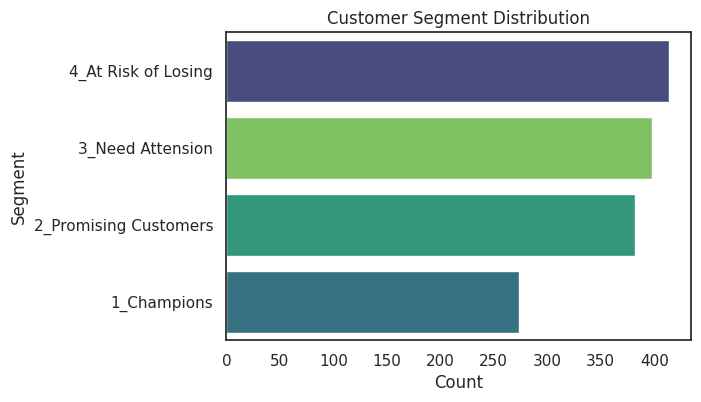

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# --- Visualization 1: Segment Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(
    data=rfm_df,
    y='RFM_segment',
    order=rfm_df['RFM_segment'].value_counts().index,
    hue='RFM_segment', 
    palette='viridis',
    legend=False
)

plt.title('Customer Segment Distribution')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

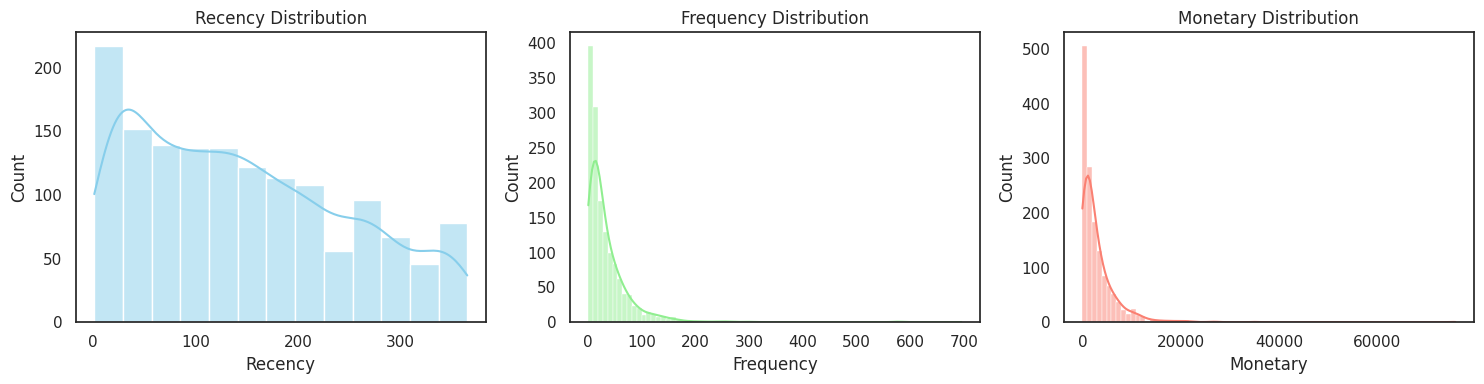

In [19]:
# --- Visualization 2: RFM Metrics Distribution ---

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(rfm_df['Recency'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Recency Distribution')
sns.histplot(rfm_df['Frequency'], ax=axes[1], kde=True, color='lightgreen')
axes[1].set_title('Frequency Distribution')
sns.histplot(rfm_df['Monetary'], ax=axes[2], kde=True, color='salmon')
axes[2].set_title('Monetary Distribution')
plt.tight_layout()
plt.show()

## 3.2. Predicting Your Most Valuable Customers

Which specific customer characteristics (Gender, Location, Tenure) and transaction details (Coupon Status, Discount Percentage) are the strongest predictors of a customer belonging to the '1_Champions' RFM segment?

### Step 1. Prepare the Merged Customer Profile Data
We need to combine the individual transaction data's customer profile features (Gender, Location, etc.) with the customer-level RFM scores.

In [20]:
customer_features = df.groupby('CustomerID').agg(
    Gender=('Gender', 'first'),
    Location=('Location', 'first'),
    Tenure_Months=('Tenure_Months', 'first'),
    Offline_Spend=('Offline_Spend', 'first'),
    Online_Spend=('Online_Spend', 'first')
).reset_index()

#Merge two tables of customer_features and RFM_df
analytical_df = pd.merge(customer_features, rfm_df, on='CustomerID', how='inner')


print("Shape of the Analytical DataFrame:", analytical_df.shape)
print("\nFirst 5 rows of the Analytical DataFrame:")
display(analytical_df.head())

Shape of the Analytical DataFrame: (1468, 14)

First 5 rows of the Analytical DataFrame:


,CustomerID,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Recency,Frequency,Monetary,R_score,F_score,M_score,Total_RFM_score,RFM_segment
0,12346.0,F,New York,31.0,3000.0,2546.67,108,2,30.99,3,1,1,5,4_At Risk of Losing
1,12347.0,M,New York,20.0,2000.0,1984.00,60,60,13834.90,4,5,5,14,1_Champions
2,12348.0,M,California,39.0,3500.0,2217.07,74,23,1442.12,4,3,3,10,2_Promising Customers
3,12350.0,M,California,25.0,4000.0,3434.31,18,17,1360.07,5,3,3,11,2_Promising Customers
4,12356.0,F,Chicago,31.0,3000.0,2546.67,108,36,1442.47,3,4,3,10,2_Promising Customers


### Step 2. Define Target Variable and Feature Engineering
We will now prepare the data for the machine learning model by defining the target variable and encoding the categorical features.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Define the target variable ---
analytical_df['is_champion'] = (analytical_df['RFM_segment'] == '1_Champions').astype(int)

# 2. Select Features (X) and Target (y) ---
feature_cols = ['Gender', 'Location', 'Tenure_Months', 'Offline_Spend', 'Online_Spend']
X = analytical_df[feature_cols].copy()
y = analytical_df['is_champion']


# 3. Handle Categorical Features using One-Hot Encoding ---
# This converts text categories (like Gender: M/F and Location: Chicago/New York) into numerical columns (0s and 1s) for the model.
X_encoded = pd.get_dummies(X, columns=['Gender', 'Location'], drop_first=True)


print("\nFeatures for the model (first 5 rows):")
display(X_encoded.head())

print("\nTarget distribution:")
print(y.value_counts())



Features for the model (first 5 rows):


,Tenure_Months,Offline_Spend,Online_Spend,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,31.0,3000.0,2546.67,False,False,False,True,False
1,20.0,2000.0,1984.00,True,False,False,True,False
2,39.0,3500.0,2217.07,True,False,False,False,False
3,25.0,4000.0,3434.31,True,False,False,False,False
4,31.0,3000.0,2546.67,False,True,False,False,False



Target distribution:
is_champion
0    1194
1     274
Name: count, dtype: int64


### Step 3. Build and Evaluate the Classification Model
We will use Logistic Regression, a simple and interpretable model, to predict the is_champion status.

--- Logistic Regression Model Performance ---
Accuracy: 0.7092

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       242
           1       0.69      0.74      0.71       236

    accuracy                           0.71       478
   macro avg       0.71      0.71      0.71       478
weighted avg       0.71      0.71      0.71       478



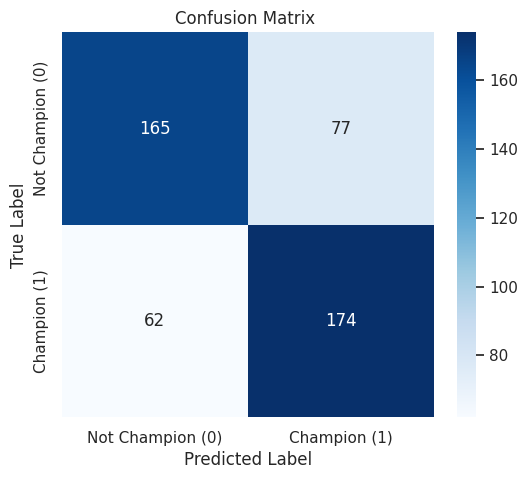

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# A. Split the Data ---

# Split the data into 70% for training the model and 30% for testing its performance.
#X_train, X_test, y_train, y_test = train_test_split(
#    X_encoded, y, test_size=0.3, random_state=42, shuffle=True
#)



# Apply SMOTE
#SMOTE creates synthetic Champion samples and balances the dataset.
#This usually improves recall for class 1 significantly.
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


# B. Train the Model ---
# Initialize and train the Logistic Regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42) # , class_weight='balanced'
model.fit(X_train, y_train)


# C. Make Predictions ---
y_pred = model.predict(X_test)

# D. Evaluate Model Performance ---
print("--- Logistic Regression Model Performance ---")

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# 2. Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Random Forest is typically better suited for this type of problem
# 3. Confusion Matrix (Visualizing correct/incorrect predictions)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Champion (0)', 'Champion (1)'], 
            yticklabels=['Not Champion (0)', 'Champion (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix ')
plt.show()




**Confusion Matrix Interpretation**

**1. True Positives (TP): Correctly Identified Champions**

* **Value: 174**
* The model correctly predicted 174 customers as **Champions (1)** when they truly belong to this class.
* This shows the model is now successfully recognizing a substantial portion of Champions.

---

**2. True Negatives (TN): Correctly Identified Non-Champions**

* **Value: 165**
* These customers were correctly classified as **Not Champions (0)**.
* The model can reliably identify many non-Champion customers as well.

---

**3. False Positives (FP): Incorrectly Predicted Champions (Over-Prediction)**

* **Value: 77**
* These customers were predicted to be Champions, but are actually Not Champions.
* This indicates the model is somewhat aggressive in identifying potential Champions, leading to some misclassifications.

---

**4. False Negatives (FN): Missed Champions (Under-Prediction)**

* **Value: 62**
* These customers are real Champions, but the model predicted them as Not Champions.
* Although not ideal, FN has significantly improved compared to the original model (which had **82 FN** and **0 TP**).

---
**Overall Interpretation**

* The model now predicts both classes effectively.
* Recall for Champions is **0.74**, meaning the model detects most of them.
* Precision for Champions is **0.69**, showing reasonable reliability.
* The confusion matrix demonstrates a **balanced trade-off** between identifying Champions and limiting false alarms.



## 3.3. Model Interpretation
To answer the project question—Predicting purchase decisions based on session attributes and customer profiles—we interpret the coefficients of the Logistic Regression model.

--- Feature Influence on Predicting 'Champion' Status ---
Interpretation: A positive coefficient means the feature increases the probability of being a 'Champion'.


,Feature,Coefficient
5,Location_New Jersey,1.403822
7,Location_Washington DC,1.379980
4,Location_Chicago,1.330634
6,Location_New York,1.101976
3,Gender_M,0.667670
1,Offline_Spend,0.000312
2,Online_Spend,-0.000002
0,Tenure_Months,-0.002105


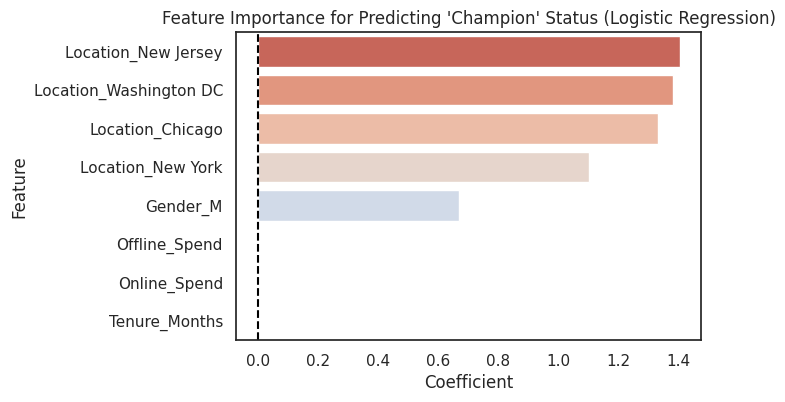

In [23]:
# Display model coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("--- Feature Influence on Predicting 'Champion' Status ---")
print("Interpretation: A positive coefficient means the feature increases the probability of being a 'Champion'.")
display(coefficients)

plt.figure(figsize=(6,4))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm_r')
plt.title("Feature Importance for Predicting 'Champion' Status (Logistic Regression)")
plt.axvline(0, color='black', linestyle='--')
plt.show()


**Interpretation of Feature Influence on Predicting 'Champion' Status**

**Ranked Features With Interpretation**

---

**1. Location_New Jersey — 1.403822**

**Strongest positive influence.**
Customers located in **New Jersey** are *most likely* to be classified as Champions compared to the baseline location.
This is now the top predictor.

---

**2. Location_Washington DC — 1.379980**

**Strong positive influence.**
Customers in **Washington DC** also have a high likelihood of being Champions.
Very similar impact magnitude to New Jersey.

---

**3. Location_Chicago — 1.330634**

**Strong positive influence.**
Chicago customers are significantly more likely to be Champions as well.
This remains one of the key geographic predictors.

---

**4. Location_New York — 1.101976**

**Moderate-to-strong positive influence.**
Customers in **New York** also demonstrate an increased probability of being Champions, though slightly less compared to the top three locations.

---

**5. Gender_M — 0.667670**

**Moderate positive influence.**
Male customers have a higher probability of being Champions than the baseline gender.
This effect is meaningful but smaller than location impact.

---

**6. Offline_Spend — 0.000312**

**Negligible positive effect.**
The coefficient is extremely small; it does not materially affect the likelihood of Champion classification.

---

**7. Online_Spend — –0.000002**

**Negligible negative effect.**
The influence rounds effectively to zero; spending online does not meaningfully differentiate Champions.

---

**8. Tenure_Months — –0.002105**

**Very small negative influence.**
Longer tenure is associated with a slightly lower probability of being a Champion, but the effect is so small as to be practically irrelevant.

---

**Summary**

* **Location** is by far the most influential factor for predicting Champion status.
* **New Jersey, Washington DC, Chicago, and New York** all strongly increase the probability of being a Champion.
* **Gender (Male)** has a smaller but still meaningful positive effect. It means a higher proportion of male customers qualify as Champions, even though fewer males exist and women spend more overall.
* **Spending variables** and **Tenure** have **negligible impact** in this model — their coefficients are too small to drive meaningful predictions.

